In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import math

In [191]:
# -----------------------------------------------------------
# Import Iris Dataset
# -----------------------------------------------------------

colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('dataset/iris.data', header=None, names=colnames)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


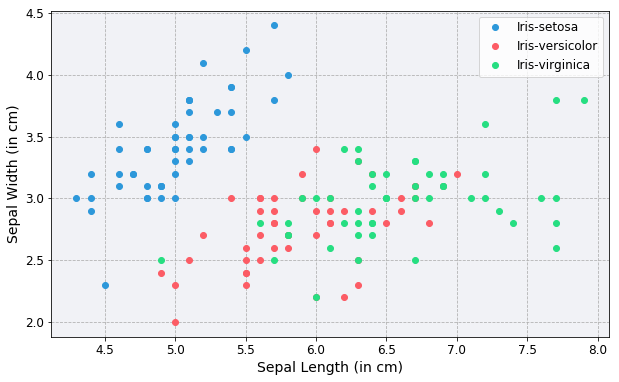

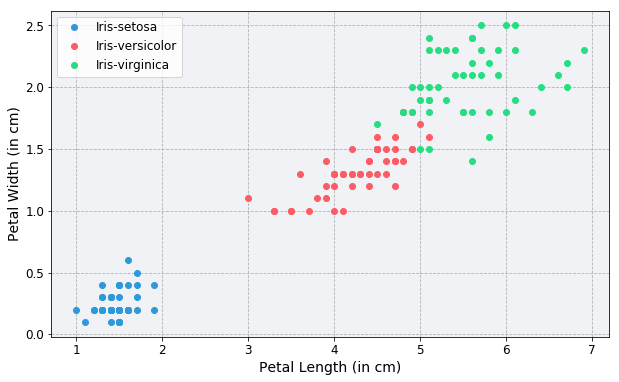

In [192]:
# -----------------------------------------------------------
# Create Visualistaion
# -----------------------------------------------------------

# Plot sepal length vs sepal width
plt.figure(figsize=(10,6))
for color, label in zip(['#2d98da', '#fc5c65', '#26de81'], df['label'].unique()):
    subset = df[df['label'] == label]
    plt.plot(subset['sepal_length'], subset['sepal_width'], 'o', color=color, label=label)
plt.xlabel('Sepal Length (in cm)', fontsize=14)
plt.ylabel('Sepal Width (in cm)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='dashed')
plt.legend(fontsize=12)
plt.gca().set_facecolor('#f1f2f6')
plt.show()

# Plot petal length vs petal width
plt.figure(figsize=(10,6))
for color, label in zip(['#2d98da', '#fc5c65', '#26de81'], df['label'].unique()):
    subset = df[df['label'] == label]
    plt.plot(subset['petal_length'], subset['petal_width'], 'o', color=color, label=label)
plt.xlabel('Petal Length (in cm)', fontsize=14)
plt.ylabel('Petal Width (in cm)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='dashed')
plt.legend(fontsize=12)
plt.gca().set_facecolor('#f1f2f6')
plt.show()

In [185]:
# convert labels from string to integer (it is easier to deal with numerical values in numpy). 
for i, label in enumerate(df['label'].unique()):
    df['label'].replace(to_replace=label, value=i, inplace=True)

# convert from dataframe to numpy arrays as `train_test_split` doesn't work with dataframes.
X = np.array(df.iloc[:, :4])
y = np.array(df.iloc[:, 4])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25) # 25 is my favourite number :)

In [186]:
# -----------------------------------------------------------
# K-Nearest Neighbours Classifier Implementation
# -----------------------------------------------------------

class KNearestNeighbours:
    def train(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def predict(self, X_test, y_test, k):
        predictions = np.empty((X_test.shape[0]), dtype=int)
        for i in range(X_test.shape[0]):
            x = X_test[i, :]
            d = np.sqrt(np.sum(np.square(self.X - x), axis=1))
            labels_of_neighbours = self.y[np.argpartition(d, k)[:k]]
            predicted_label = Counter(labels_of_neighbours).most_common(1)[0][0]
            predictions[i] = predicted_label
        
        misclassifications = np.sum(y_test != predictions)
        #print(y_test)
        #print(predictions)
        return predictions, misclassifications


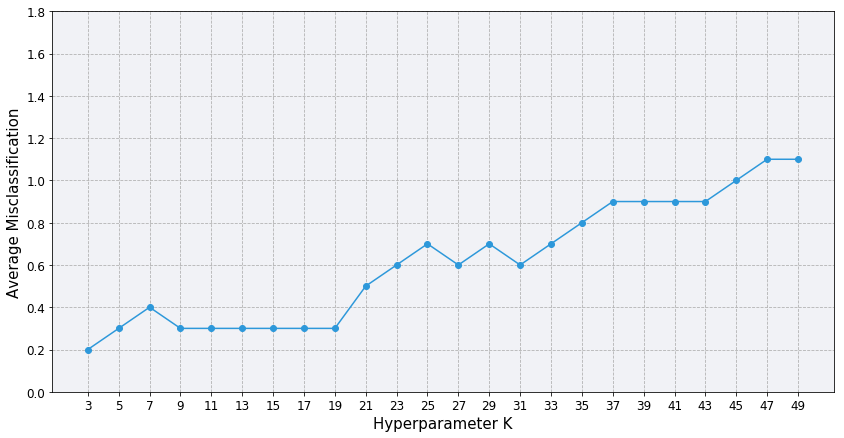

In [188]:
# --------------------------------------------------------------------------
# k-fold cross validation for finding the best K for K-Nearest Neighbours
# --------------------------------------------------------------------------

# Note : I have used K (captial k) to denoted the hyperparameter for kNN, and 
# k (small k) to denoted the number of folds used in the cross validation phase.

def k_fold_cross_validation(X, y, k):
    
    # let's consider only odd values for K since even values could lead to a tie.
    potential_Ks = range(3, 50, 2)
    errors = [0] * len(potential_Ks)
    
    # divide training set in k folds.
    q = X.shape[0] // k
    rem = X.shape[0] - q * k
    fold_sizes = np.full(k, q)
    fold_sizes[:rem] += 1
    
    for n, K in enumerate(potential_Ks):
        start = 0
        avg_error = 0
        for i in range(k):
            stop = start + fold_sizes[i]
            
            X_test = X[start:stop]
            y_test = y[start:stop]
            
            train_mask = np.full(X.shape[0], True)
            train_mask[start:stop] = False

            X_train = X[train_mask]
            y_train = y[train_mask]
            
            kNN = KNearestNeighbours()
            kNN.train(X_train, y_train)
            _, error = kNN.predict(X_test, y_test, K)

            avg_error += error
            
            start = stop
        avg_error /= k
        errors[n] = avg_error
    
    return potential_Ks, errors

Ks, errors = k_fold_cross_validation(X_train, y_train, 10)
plt.figure(figsize=(14,7))
plt.plot(Ks, errors, '-o', color='#2d98da')
plt.ylabel('Average Misclassification', fontsize=15)
plt.xlabel('Hyperparameter K', fontsize=15)
plt.xticks(np.arange(3, 50, 2), fontsize=12)
plt.yticks(np.arange(0, 2, 0.2), fontsize=12)
plt.grid(linestyle='dashed')
plt.gca().set_facecolor('#f1f2f6')
plt.show()


    
#kNN = KNearestNeighbours()
#kNN.train(X_train, y_train)
#predictions, errors = kNN.predict(X_test, y_test, 7)
